# Revisão Limites e Derivadas (Regressão Logística)

## Introdução

Nesta aula, desvendaremos a "mágica" por trás da Regressão Logística, um dos algoritmos de classificação mais fundamentais. Em vez de tratá-la como uma caixa-preta, entenderemos como o cálculo (especificamente, derivadas e limites) é o motor que a faz funcionar.


## A teoria por trás do aprendizado

### O problema de classificação

A Regressão Logística é usada para problemas de classificação binária, como prever se um e-mail é spam ou não, se um cliente irá comprar um produto, ou se um tumor é maligno.

Diferente da Regressão Linear, que prevê um valor contínuo (ex: preço de uma casa), a Regressão Logística prevê uma probabilidade de que um dado pertença a uma certa classe (0 ou 1).

A grande pergunta é: Como o modelo encontra a melhor "linha de separação" para classificar os dados? A resposta está no cálculo!


## Revisão super rápida de Limites e Derivadas

*Limites*: Pense em um limite como o valor que uma função se aproxima à medida que a entrada se aproxima de um certo ponto. Na Regressão Logística, usamos limites para entender o comportamento da função de ativação.

*Derivadas*: A derivada é a taxa de variação instantânea de uma função. No nosso contexto, ela nos diz a "inclinação" da nossa função de custo.

Se a derivada é positiva, o custo está subindo.

Se a derivada é negativa, o custo está descendo.

A derivada é a nossa bússola! Ela nos diz em qual direção devemos ajustar os parâmetros do modelo para diminuir o erro.


### Limites
- Comportamento da função sigmoide: $ h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}} $ tende a 0 ou 1.
- Limite em pontos críticos (ex.: $ x \to \infty $).

### Derivadas
- Derivada da sigmoide: $ h_\theta'(x) = h_\theta(x) (1 - h_\theta(x)) $.
- Função de custo: $ J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1 - h_\theta(x^{(i)}))] $.
- Gradiente: $ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} $.

Se a derivada é zero, estamos no ponto de mínimo (ou máximo) do custo.


## Componentes da regressão Logística

**A Função Sigmoide** : Para converter a saída linear do modelo em uma probabilidade entre 0 e 1, usamos a função sigmoide.

A equação é:
![image.png](attachment:image.png)

Onde z é a combinação linear das características e seus pesos: z = w_0 + w_1x_1 + w_2x_2+...
A função **sigmoid** "achata" a saida, garantindo que o resultado esteja sempre entre 0 e 1.

Onde z é a "pontuação" que o modelo de regressão logística calculou (soma dos pesos multiplicado pelas caracteristicas).
"e" é uma constante matemática, base do logaritmo natural.
e^-z é o "e" elevado a potencia de -z.
    
    - Se z for um numero grande e positivo se tornará um numero pequeno ex.: e^-5 = 0.0067
    - Se z for um numero grande e negativo se tornará um numero grande ex.: e^5 = 148.4

E o passo final é o calculo da probabilidade final:
    - 1 / (1+ e^-z) essa relação garante um valor de saida entre 0 e 1.
    
    - Ex 1 (z = -5).: 1 / (1 + e^-5) = 1 / (1 + 0.0067) = 1 / 1.0067 = 0.993  (Probabilidade alta)
    - Ex 2 (z = 5).: 1 / (1 + e^5) = 1 / (1 + 148.4) = 1 / 149.4 = 0.0067     (Probabilidade baixa)
    - Ex 3 (z = 0).: 1 / (1 + e^0) = 1 / (1 + 1) = 1 / 2 = 0.5                (Probabilidade média 50%)


Imagine a função sigmoide como uma espécie de "porta" ou "tradutor" mágica.

Recebe qualquer número que você der a ela (positivo, negativo, grande, pequeno...) e transforma esse número em um valor que está sempre entre 0 e 1.

Não importa se você dá o número 1000 ou -50, a sigmoide sempre irá "espremer" esse valor para um número que pode ser interpretado como uma probabilidade.

Analogia do Elevador de Probabilidade
Pense em um elevador em um prédio.

O andar de baixo do prédio é o 0 (0% de probabilidade).

O andar de cima do prédio é o 1 (100% de probabilidade).

A função sigmoide é como o botão do elevador. Você pode apertar qualquer andar (qualquer número), mas o elevador só vai te levar para algum lugar entre o andar 0 e o andar 1.

Se o número que você dá é muito grande e positivo, a sigmoide leva você para o andar 1 (probabilidade de 100%).

Se o número que você dá é muito grande e negativo, a sigmoide leva você para o andar 0 (probabilidade de 0%).

Se o número é zero, ela te leva exatamente para o meio, o andar 0.5 (probabilidade de 50%).

Por que isso é tão importante na Regressão Logística?
Na Regressão Logística, o modelo primeiro faz um cálculo simples para cada pessoa (ou item), como este:

Resultado = (Peso1 * Característica1) + (Peso2 * Característica2) + ...

Esse Resultado pode ser qualquer número, tipo 5, -10, ou 0.25.

Mas nós não queremos um número qualquer! Queremos saber a probabilidade de, por exemplo, um cliente sair da empresa (churn). É aí que a sigmoide entra:

Probabilidade de Churn = sigmoid(Resultado)

A sigmoide pega esse Resultado e o converte em uma probabilidade real, por exemplo, 0.85 (85% de chance de churn).



**A função de custo (Log Loss)** : Precisamos de uma função para medir o quão ruim é a previsão do nosso modelo. O Erro Quadrático Médio (MSE) funciona mal para a classificação (não é convexa), então usamos a Entropia Cruzada ou Log Loss.

A equação para um único exemplo é:

![image-2.png](attachment:image-2.png)

Onde y é o valor real (0 ou 1) e
haty é a probabilidade prevista pelo modelo.

Por que essa função? Ela penaliza muito mais uma previsão errada e confiante. Se a resposta é 1, mas o modelo prevê 0, ele receberá um custo muito alto. Se a resposta é 1 e ele prevê 0.99, o custo será quase zero.


### O coração do aprendizado: O Gradiente Descendente

O Gradiente Descendente é um algoritmo de otimização que usa a derivada para encontrar o ponto de mínimo da função de custo. A ideia é simples: Começamos com pesos aleatórios.
Calculamos o "declive" (derivada) da função de custo para nossos pesos atuais.
Movemos os pesos na direção oposta ao declive para descer o vale do custo.
Repetimos o processo até chegarmos ao fundo.
A regra de atualização dos pesos (w) é:

![image-3.png](attachment:image-3.png)

- $ \frac{\partial J}{\partial w_j} $: É a derivada da função de custo em relação ao peso w_j.

- alpha (alfa): É a taxa de aprendizado, que controla o tamanho de cada passo que damos.






### **Classificação de e-mails (spam vs não-spam)**

Limite: Imagine aumentar a quantidade de palavras suspeitas (ex: “promoção”, “clique aqui”). Quando esse número cresce demais, a chance de ser spam se aproxima de 100% — esse é o limite.

Derivada: Mostra a velocidade com que a probabilidade muda ao adicionar mais uma palavra suspeita.

Gráfico: Numero de palavras suspeitas no eixo X, versus a probabilidade de spam eixo Y, com a curva sigmoide,

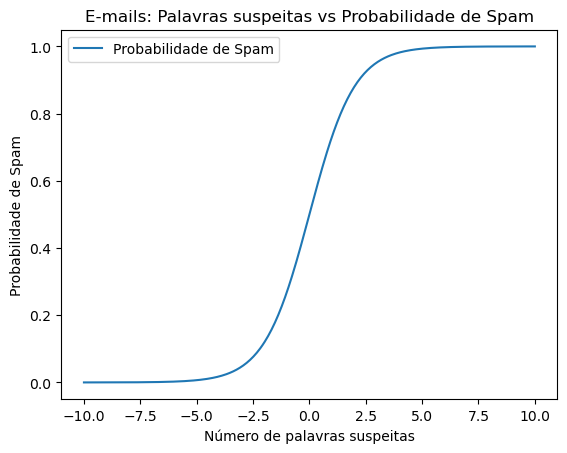

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10, 10, 400)
y = 1 / (1 + np.exp(-x)) # Sigmoide


plt.plot(x, y, label="Probabilidade de Spam")
plt.title("E-mails: Palavras suspeitas vs Probabilidade de Spam")
plt.xlabel("Número de palavras suspeitas")
plt.ylabel("Probabilidade de Spam")
plt.legend()
plt.show()

### **Reconhecimento de voz (Siri, Alexa, Google Assistente)**

Limite: Quanto mais silencioso o ambiente, mais a chance de erro do modelo vai para 100% (limite). Quanto mais nítida a fala, o erro tende a 0.

Derivada: Mede o quanto a qualidade do áudio impacta na precisão. Pequenos aumentos na clareza do som podem causar uma grande melhora no reconhecimento.

Gráfico de “ruído do ambiente” no eixo x e “erro do modelo” no eixo y, caindo bruscamente no começo e depois ficando estável.

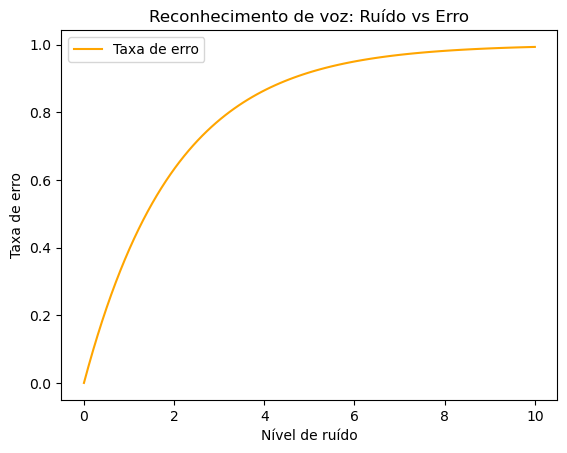

In [ ]:
noise = np.linspace(0, 10, 100)
error_rate = 1 - np.exp(-noise/2)


plt.plot(noise, error_rate, color="orange", label="Taxa de erro")
plt.title("Reconhecimento de voz: Ruído vs Erro")
plt.xlabel("Nível de ruído")
plt.ylabel("Taxa de erro")
plt.legend()
plt.show()

### **Previsão do preço de corridas de Uber**

Limite: Se você pedir uma corrida muito curta (tipo 100 metros), o preço tende a um valor mínimo (taxa base). Esse é o limite inferior.

Derivada: Mede como o preço cresce em relação à distância. Nos primeiros quilômetros, pode crescer rápido, mas depois a variação por km pode ser menor.

Gráfico de distância percorrida (x) vs preço da corrida (y), mostrando curva que começa alta (taxa mínima), sobe rápido e depois cresce mais suavemente.

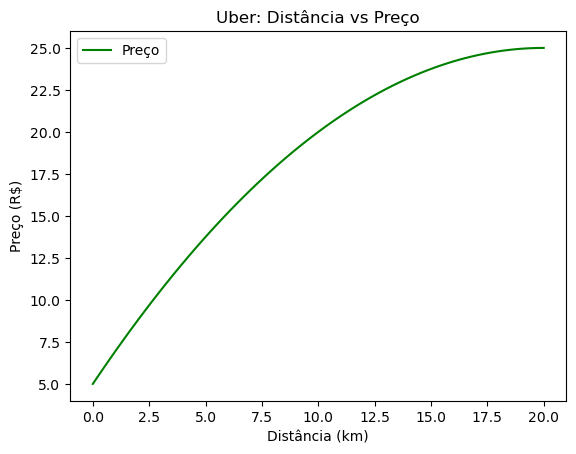

In [ ]:
distance = np.linspace(0, 20, 100)
price = 5 + 2*distance - 0.05*distance**2 # Simulação com taxa base + redução marginal


plt.plot(distance, price, color="green", label="Preço")
plt.title("Uber: Distância vs Preço")
plt.xlabel("Distância (km)")
plt.ylabel("Preço (R$)")
plt.legend()
plt.show()

### **Sistemas de recomendação (Netflix, Spotify, YouTube)**

Limite: Se você assistir apenas filmes de ação, o modelo tende ao limite de recomendar 100% ação.

Derivada: Mede o quanto a recomendação muda se você assistir um novo filme diferente (ex: comédia).

Grafico de barras mostrando proporção de gêneros assistidos (ação vs comédia). A derivada seria a mudança brusca na recomendação quando você adiciona um novo gênero.

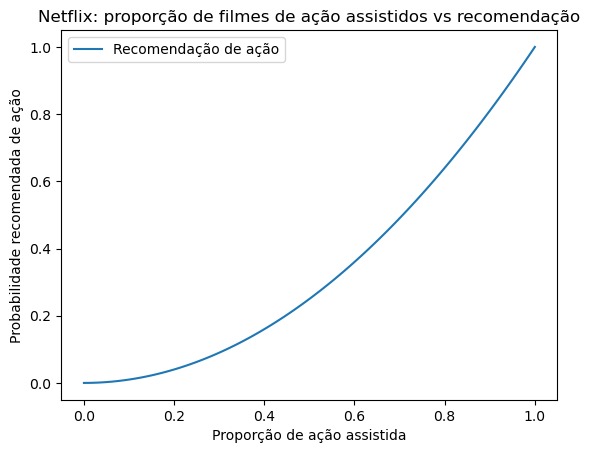

In [ ]:
prop_acao = np.linspace(0, 1, 100)
recomendacao_acao = prop_acao**2


plt.plot(prop_acao, recomendacao_acao, label="Recomendação de ação")
plt.title("Netflix: proporção de filmes de ação assistidos vs recomendação")
plt.xlabel("Proporção de ação assistida")
plt.ylabel("Probabilidade recomendada de ação")
plt.legend()
plt.show()

### **Classificação de imagens (gato vs cachorro)**

Limite: Quanto mais nítida a imagem do gato (orelhas, bigodes, etc.), mais a probabilidade se aproxima de 100% de ser gato.

Derivada: Mede a sensibilidade da rede: pequenas mudanças (como borrar a imagem) podem alterar muito a probabilidade.

Gráfico, Mostrar uma sequência de imagens (nítida → borrada) com a probabilidade de “gato” caindo progressivamente.

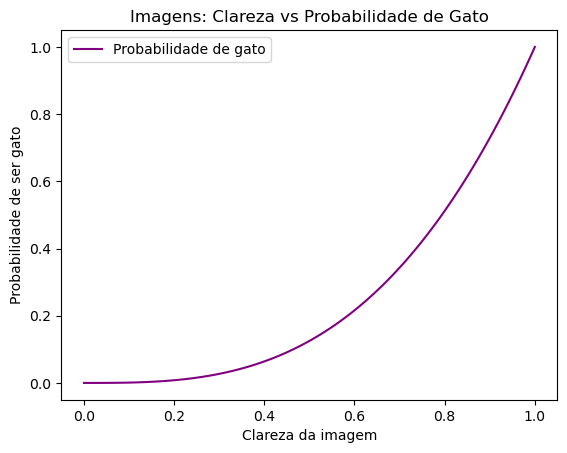

In [ ]:
claridade = np.linspace(0, 1, 100)
prob_gato = claridade**3


plt.plot(claridade, prob_gato, color="purple", label="Probabilidade de gato")
plt.title("Imagens: Clareza vs Probabilidade de Gato")
plt.xlabel("Clareza da imagem")
plt.ylabel("Probabilidade de ser gato")
plt.legend()
plt.show()

In [1]:
from funcoes import sigmoid, gradient_descent